In [26]:
# Need to do this before importing RV when running in a Docker container from VS Code.
# This has to do with the fact that VS Code is not setting env vars in the notebook correctly.
import os
os.environ['GDAL_DATA'] = '/opt/conda/lib/python3.7/site-packages/rasterio/gdal_data/'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from os.path import join

import matplotlib.pyplot as plt

from rastervision.pytorch_learner.dataset import (
    SemanticSegmentationSlidingWindowGeoDataset, ObjectDetectionSlidingWindowGeoDataset)
from rastervision.pytorch_learner.visualizer import (
    SemanticSegmentationVisualizer, ObjectDetectionVisualizer)
from rastervision.core.data import ClassConfig

In [37]:
class_names = ['Building']
class_config = ClassConfig(names=class_names)
channel_order = [0, 1, 2, 3]
channel_display_groups = {'RGB': (0, 1, 2), 'IR': (3, )}

root_uri = '/opt/data/spacenet-sample'
image_uri = join(root_uri, 'SN2_buildings_train_AOI_5_Khartoum_PS-MS_img1003.tiff')
label_uri = join(
    root_uri, 'SN2_buildings_train_AOI_5_Khartoum_geojson_buildings_img1003.geojson')

ds = SemanticSegmentationSlidingWindowGeoDataset.from_uris(
    class_config=class_config,
    image_uri=image_uri,
    label_vector_uri=label_uri,
    size=300,
    stride=150,
    image_raster_source_kw={'channel_order': channel_order})

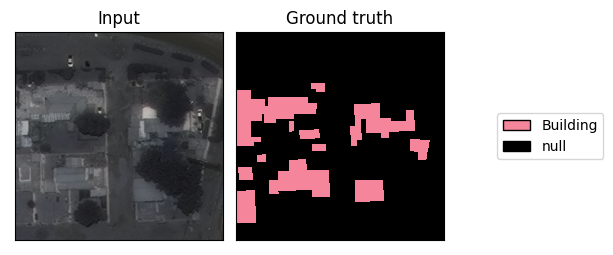

In [39]:
vis = SemanticSegmentationVisualizer(
    class_names=class_config.names, class_colors=class_config.colors)
x, y = vis.get_batch(ds, 1)
vis.plot_batch(x, y, show=True)